In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

The following code is only used to understand DataFrame format, and some opreations.

In [4]:
df=pd.DataFrame([[1,2,2],[1,4,5],[1,2,4],[1,6,3],[2,3,1],[2,4,1],[2,3,5],[3,1,1]],columns=['A','B','C'])
gp=df.groupby(by=['A','B'])
gp = gp.size().reset_index(name='times')
print(gp)

   A  B  times
0  1  2      2
1  1  4      1
2  1  6      1
3  2  3      2
4  2  4      1
5  3  1      1


In [48]:
df_csv = pd.read_csv('test3D.csv')
total_no = len(df_csv)
gp=df_csv.groupby(by=['HRD5','HPD5'])
gp = gp.size().reset_index(name='times')
gp['times'] /= total_no
print(gp)

    HRD5  HPD5     times
0     12    11  0.007194
1     12    20  0.014388
2     12    22  0.007194
3     12    23  0.007194
4     12    29  0.021583
5     13    10  0.007194
6     13    11  0.014388
7     13    12  0.021583
8     13    14  0.021583
9     13    15  0.007194
10    13    16  0.021583
11    13    17  0.007194
12    13    19  0.028777
13    13    20  0.028777
14    13    21  0.007194
15    13    22  0.014388
16    13    24  0.050360
17    13    25  0.021583
18    13    26  0.007194
19    13    27  0.035971
20    13    28  0.007194
21    13    29  0.014388
22    14    11  0.035971
23    14    12  0.035971
24    14    13  0.021583
25    14    15  0.007194
26    14    16  0.043165
27    14    17  0.028777
28    14    18  0.021583
29    14    19  0.043165
30    14    20  0.021583
31    14    21  0.021583
32    14    22  0.021583
33    14    23  0.028777
34    14    25  0.028777
35    14    26  0.021583
36    14    27  0.021583
37    14    28  0.028777
38    14    29  0.007194


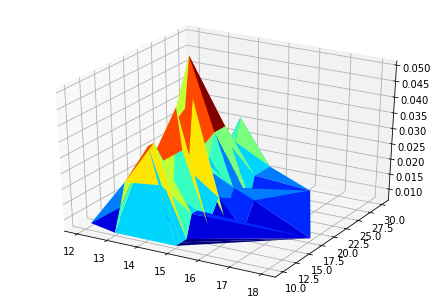

In [49]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(gp.HRD5, gp.HPD5, gp.times, cmap=cm.jet, linewidth=0.2)
plt.show()

In [84]:
# concentrate Ebike data and E4 data in one csv file 
df1 = pd.read_csv("export_EBikedata.csv")
df2 = pd.read_csv("bpm_data.csv")
merged = df1.merge(df2, on="time", how="outer").fillna("")
merged.replace("", np.nan, inplace=True)            
merged.dropna(axis=0, how='any',inplace=True)
print(merged)
#merged.to_csv("merged.csv", index=False)


gp = merged.groupby(by=['D5_humanPower','d5_bpm'])
gp = gp.size().reset_index(name='frequence')
# probabilities 
gp['frequence'] /= len(merged)
merged = merged.merge(gp, on=['D5_humanPower','d5_bpm'], how="outer").fillna("")
merged.to_csv("merged.csv", index=False)


                 time  average_humanPower  D5_humanPower  \
0    2019-07-26-21-03               100.0           20.0   
1    2019-07-26-21-04               115.0           23.0   
2    2019-07-26-21-05                61.0           12.0   
3    2019-07-26-21-06                64.0           13.0   
4    2019-07-26-21-07                58.0           12.0   
5    2019-07-26-21-08               137.0           27.0   
6    2019-07-26-21-09               137.0           27.0   
7    2019-07-26-21-10               118.0           24.0   
8    2019-07-26-21-11                97.0           19.0   
9    2019-07-26-21-12                78.0           16.0   
10   2019-07-26-21-13               103.0           21.0   
11   2019-07-26-21-14               120.0           24.0   
12   2019-07-26-21-15                55.0           11.0   
13   2019-07-26-21-16                87.0           17.0   
14   2019-07-26-21-17               112.0           22.0   
15   2019-07-26-21-18               115.

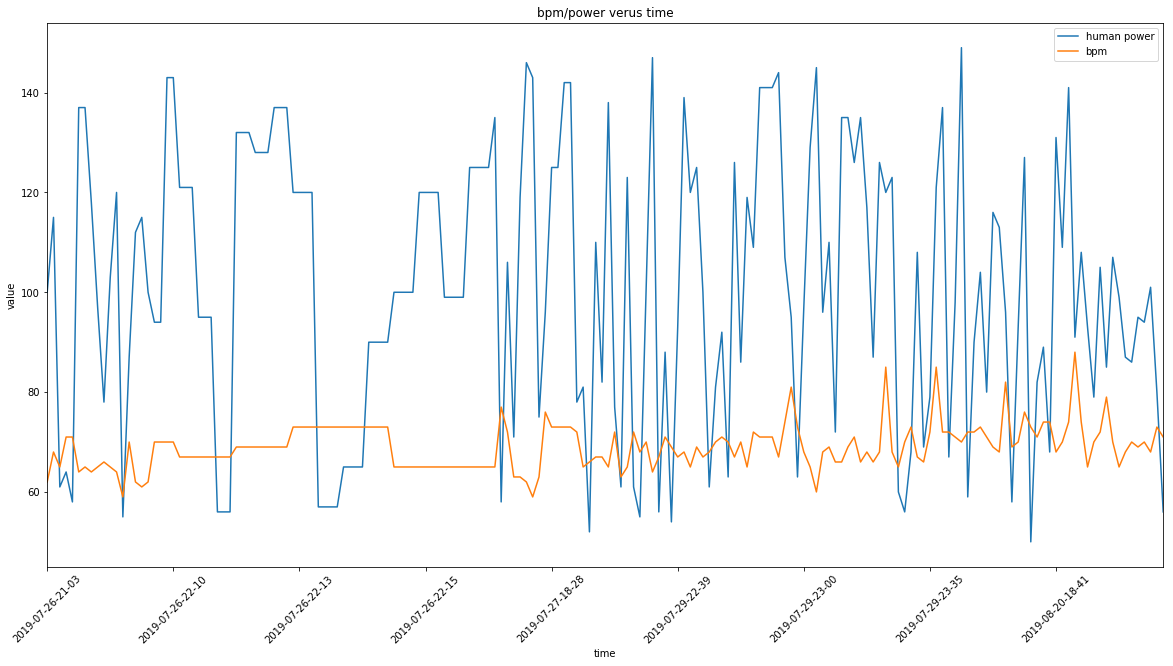

In [76]:
# 2d plot

#gp_2d = merged.groupby(by=['time','average_humanPower','bpm'])
merged.plot(x="time", y=["average_humanPower", "bpm"],label = ["human power", "bpm"],figsize = (20,10))
plt.tick_params(axis='x', rotation=45)
plt.title('bpm/power verus time')
plt.xlabel('time')
plt.ylabel('value')

plt.show()



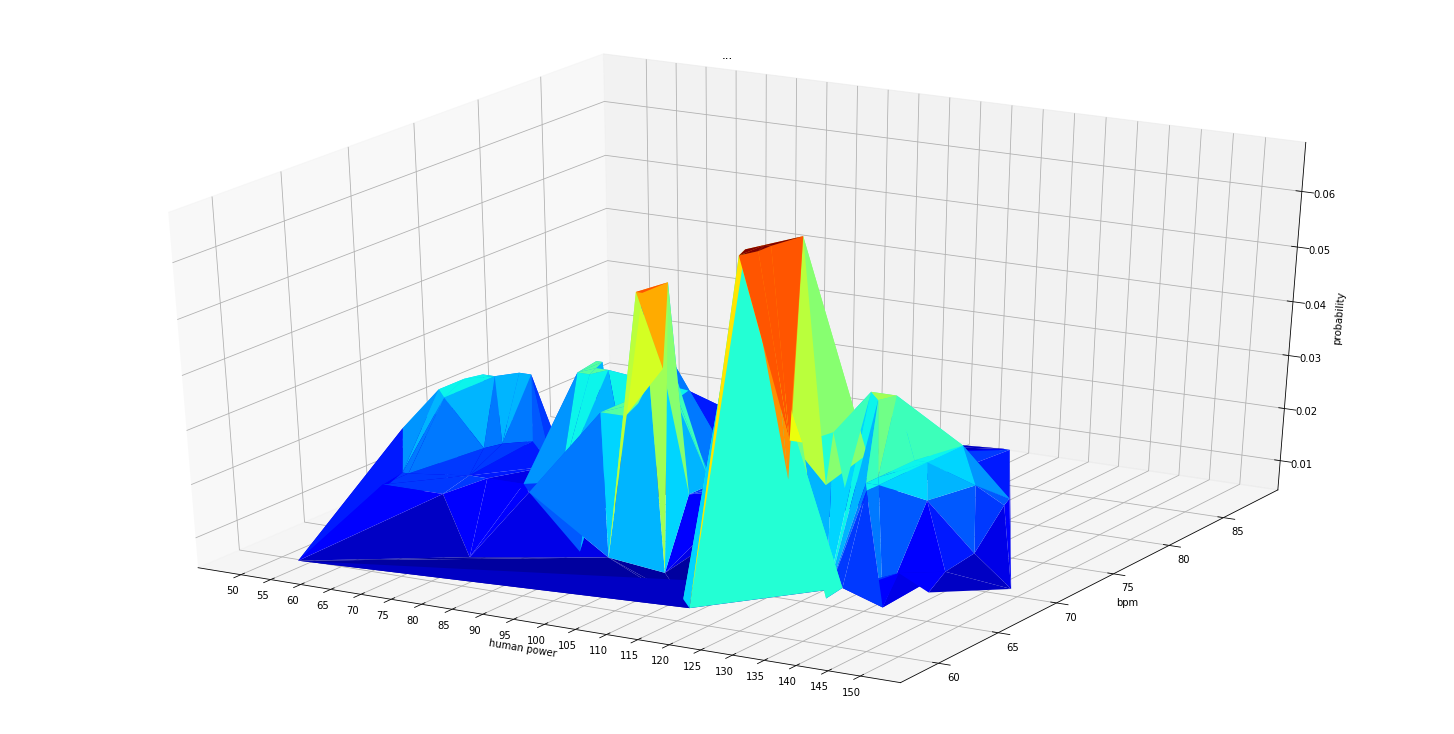

In [87]:
# 3d Plot
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

test = plt.figure(figsize = (20,10))
test_ax = Axes3D(test)
#test_ax.plot_trisurf(gp.D5_humanPower*5, gp.d5_bpm*5, gp.frequence, cmap=cm.jet, linewidth=0.2)
test_ax.plot_trisurf(merged.average_humanPower, merged.bpm,merged.frequence, cmap=cm.jet, linewidth=0.2)

plt.title('...')
test_ax.set_xlabel('human power')
test_ax.set_ylabel('bpm')
test_ax.set_zlabel('probability')

test_ax.xaxis.set_major_locator(MultipleLocator(5))

plt.show()